# Linear regression

<p>Given a training data set comprising N observations $\{x_{n}\}$, where n = 1,...,N,together with corresponding target values $\{t_{n}\}$, the goal is to predict the value of t for a new value of x. From a probabilistic perspective we want to model $p(t|x)$ because this expresses our uncertainty about the value of t for each value of x.

## Linear Basis Function Models

The linear model for regression has the following form:

$$ y(x,w) = w_{0} + \sum_{j=1}^{M-1}w_{j}\phi_{j}(x) $$

where $\phi_{j}(x)$ are called bassis functions.
If we note $\phi_{0}(x) = 1$ then we can write:

$$ y(x,W) = \sum_{j=0}^{M-1}w_{j}\phi_{j}(x) = W^{T}\Phi(x)$$

where $ W = (w_{0},...,w_{M−1})^{T} $ and $ \Phi = (\phi_{0},...,\phi_{M−1})^{T}$

If the original variables comprise the vector x, then the features can be expressed in terms of the basis functions ${\phi_{j}(x)}$.
In the example the basis functions take the form $\phi_{j}(x) = x^{j}$

In the following discussion the basis function takes the form $\phi_{j}(x) = x$

### Maximum likelihood and least squares

We assume that:
$$ t = y(x, w) + \epsilon $$
where $\epsilon$ is a zero mean Gaussian random variable with precision (inverse variance) $\beta^{-1}$. Therefore, we can write:

$$
\begin{equation*}
p(t|x,W,\beta) = N(t|y(x, W), \beta^{-1}) 
\label{eq:1} \tag{1}
\end{equation*}
$$

The optimal solution for a new value of x will be given by the conditional mean of the target variable:

$$ E[t|x] = \int tp(t|x)dt = y(x,w)$$

Let's consider:
$ X = \{x_{1}, ... , x_{N}\} $ with corresponsding target values $ \textbf{t} = \{t_{1}, ... , t_{N}\}$

Making the assumption that these data points are drawn independently from the distribution (1), we obtain the
following expression for the likelihood function:

$$ 
\begin{equation*}
p(\textbf{t}|X,W,\beta) = \prod_{n=1}^{N}N(t_{n}|W^{T}\Phi(x_{n}), \beta^{-1}) 
\label{eq:2} \tag{2}
\end{equation*}
$$

Taking the log of the likelyhood function gives:

$$
\begin{aligned}
\ln p(\textbf{t}|W,\beta) &= \sum_{n=1}^{N}\ln N(t_{n}|W^{T}\phi(x_{n}), \beta^{-1}) \\
                          &= \frac{N}{2}\ln \beta - \frac{N}{2}\ln (2\pi) - \beta E_{D}(W)
\end{aligned}
$$

where $ E_{D}(W) $ is the sum-of-squares error function:

$$ E_{D}(W) = \frac{1}{2} \sum_{n=1}^{N}(t_{n} - W^{T}\phi(x_{n}))^{2} $$

We see that maximizing the likelyhood function is equivalent to minimizing $ E_{D}(W) $.

We define the $\textbf{design matrix }$ as being an N×M matrix, whose elements are given by $ \Phi_{nj} = \phi_{j}(x_{n}) $

$$ \Phi = \begin{pmatrix}
            \phi_{0}(x_{1}) & \phi_{1}(x_{1}) & ... & \phi_{M-1}(x_{1})\\
            \phi_{0}(x_{2}) & \phi_{1}(x_{2}) & ... & \phi_{M-1}(x_{2})\\
            ... & ... & ... & ...\\
            \phi_{0}(x_{N}) & \phi_{1}(x_{N}) & ... & \phi_{M-1}(x_{N})
           \end{pmatrix} $$
           
Using the normal equation we get:

$$ W_{ML} = (\Phi^{T}\Phi)^{-1}\Phi^{T}\textbf{t} $$

We can also get the noise precision parameter $\beta$:

$$ \frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n=1}^{N}(t_{n} - W_{ML}^{T}\phi(x_{n}))^{2} $$

### Regularized least squares

We can add a regularization term to the error function so that the total error becomes:

$$ E_{D}(W) + \lambda E_{W}(W) $$

One of the simplest forms of regularizer is given by the sum-of-squares of the weight vector elements:

$$ E_{W}(W) = \frac{1}{2}W^{T}W $$

then the total error function becomes:

$$ \frac{1}{2} \sum_{n=1}^{N}(t_{n} - W^{T}\phi(x_{n}))^{2} + \frac{\lambda}{2}W^{T}W $$

Solving for W using the normal equation gives:

$$ W_{ML} = (\lambda I + \Phi^{T}\Phi)^{-1}\Phi^{T}\textbf{t} $$

## The Bias-Variance Decomposition 

We define the following notations:
t - the true target value 
$t^{pred}$ - the predicted target value 
and the squared loss $(t^{pred} - t)^{2}$

The we have:

$$ (t - t^{pred})^{2} = (t - E[t^{pred}] + E[t^{pred}] - t^{pred})^{2} $$

$$ = (t - E[t^{pred}])^{2} + (E[t^{pred}] - t^{pred})^{2} - 2(t - E[t^{pred}])(E[t^{pred}] - t^{pred}) $$

Taking the expectation on both sides:

$$ E[(t - t^{pred})^{2}] = (t - E[t^{pred}])^{2} + E[(E[t^{pred}] - t^{pred})^{2}] $$

$$ = [Bias]^{2} + Variance $$

In the programming example we have:

$$ h(x) = E[t|x] $$
$$ \bar{y}(x) = \frac{1}{L}\sum_{l=1}^{L}y^{(l)}(x) $$
$$ (bias)^2 = \frac{1}{N}\sum_{n=1}^{N}(\bar{y}(x_n) - h(x_{n}))^{2} $$
$$ variance = \frac{1}{N}\sum_{n=1}^{N}\frac{1}{L}\sum_{l=1}^{L}(y^{(l)}(x_{n}) - \bar{y}(x_{n}))^{2} $$

where there are L=100 data sets each having N = 25 data points

## Bayesian Linear Regression

One drawback of the maximum likelihood method is it usually leads to excessively complex models. Even though the model complexity can be controlled by the regularization coefficient this requires using an independet hold out data like in cross-validation.

The Bayesian treatment for linear regression avoids the problem of over-fitting of maximum likelihood.

As a reminder  the Bayesian rule provides us with a way to update our beliefs based on the arrival of new, relevant pieces of evidence.

The equation of Bayes rule is:

$$ P(A|B) = \frac{P(B|A)P(A)}{p(B)} $$

## Parameter distribution

The conjugate prior of the likelihood function (2) is given by a Gaussian ditribution. Therefore we chose the following  prior probability distribution over the model parameters w:

$$ 
\begin{equation*}
p(w) = N(w|m_{0}, S_{0}) 
\label{eq:3} \tag{3}
\end{equation*}
$$

 having mean $m_{0}$ and covariance $ S_{0}$
 
We compute the posterior distribution, which is proportional to the product of the likelihood function (2) and the prior (3):

$$ 
\begin{equation*}
p(w|t) = N(w|m_{N}, S_{N}) 
\label{eq:4} \tag{4}
\end{equation*}
$$

where

$$ m_{N} = S_{N}(S_{0}^{-1}m_{0} + \beta \Phi^{T} \textbf{t}) $$
$$ S_{N}^{-1} = S_{0}^{-1} + \beta \Phi^{T}\Phi $$

Note that because the posterior distribution is Gaussian, its mode coincides with its mean. Thus the maximum posterior weight vector is simply given by $w_{MAP} = m_{N}$ .

For simplicity we may consider the following prior distribution over w:

$$ p(w|\alpha) = N(w|0, \alpha^{-1}I) $$

and the corresponding posterior distribution over w is then given by:

$$ m_{N} = \beta S_{N} \Phi^{T}\textbf{t} $$
$$ S_{N}^{-1} = \alpha I + \beta \Phi^{T}\Phi $$

The log of the posterior distribution is given by the sum of the log likelihood and the log of the prior and, as a function of w, takes the form:

$$ \ln p(w|\textbf{t}) = - \frac{\beta}{2} \sum_{n=1}^{N}(t_{n} - w^{T}\phi (x_{n}))^{2} - \frac{\alpha}{2}w^{T}w + const $$

Maximization of this posterior distribution with respect to w is therefore equivalent to the minimization of the sum-of-squares error function with the addition of a
quadratic regularization term, corresponding to $\lambda = \frac{\alpha}{\beta}$.

## Predictive distribution

In order to make predictions of t for new values of x we need to calculate the $\textit{predictive distribution}$ defined by:

$$ p(t|\textbf{t},\alpha,\beta) = \int p(t|w,\beta)p(w|\textbf{t},\alpha, \beta)dw $$

where the first term is given by (1) and the second by (4), thus the predictive distribution takes the form:

$$ p(t|x,\textbf{t},\alpha,\beta) = N(t|m_{N}^{T}\phi(x), \sigma_{N}^{2}(x)) $$

where $\sigma_{N}^{2}(x)$ is given by:

$$ \sigma_{N}^{2}(x) = \frac{1}{\beta} + \phi(x)^{T}S_{N}\phi(x) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
from scipy.stats import multivariate_normal

from ipywidgets import interact

np.random.seed(1234)

Create data given by func and with standard deviation std

In [2]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

Compute the cost used for gradient descent

In [3]:
def computeCost(X, y, w):
    m = len(y)
    J = 0
    
    h = X @ w
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

Generate data from sin function

In [18]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

# generate 10 points from sin function with std=0.25
x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

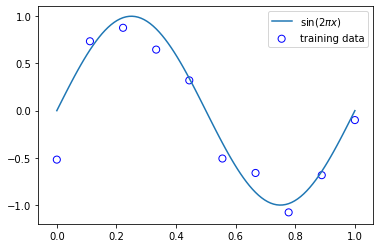

In [5]:
# plot generated data above
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.legend()
plt.show()

# Linear regression and maximum likelihood

In [8]:
@interact
def linear_regression_normal_eq(alpha = [0, 0.00001, 0.0001, 0.001, 0.003, 0.1]):
    # Compute the design matrix
    X_train = PolynomialFeatures(11).fit_transform(x_train.reshape(-1,1))
    X_test = PolynomialFeatures(11).fit_transform(x_test.reshape(-1,1))
    
    # Compute w using normal equation and regularization parameter alpha
    w = np.linalg.solve(alpha * np.eye(np.size(X_train, 1)) + X_train.T @ X_train, X_train.T @ y_train)
    y = X_test @ w
    
    m = len(y)
    cost = (1/(2*m)) * np.sum((y - y_test)**2)
    print(cost)
    print(computeCost(X_test, y_test, w))
    print(w)
    
    # next we compute the inverse of precision parameter $\beta^{-1}$
    y_std = np.sqrt(np.mean(np.square(X_train @ w - y_train)))
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, y, label="prediction")
    plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5, label="std.")
    plt.legend()
    plt.show()


interactive(children=(Dropdown(description='alpha', options=(0, 1e-05, 0.0001, 0.001, 0.003, 0.1), value=0), O…

In [9]:
# Minimize the cost function using gradient descent
def gradientDescent(X, y, learning_rate=0.1, alpha=0.01, num_iters=150000):
    m = len(y)
    w = np.zeros(X.shape[1])
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X @ w
        w = w - learning_rate*(1/m)*(X.T @ (h-y)) - alpha*(1/m)*w
        J_history[iter] = computeCost(X, y, w)
    return(w, J_history)

In [11]:
x_train1, y_train1 = create_toy_data(sinusoidal, 5, 0.45)
x_test1 = np.linspace(0, 1, 100)
y_test1 = sinusoidal(x_test1)

@interact
def linear_regression_GD(alpha = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3]):
    X_train1 = PolynomialFeatures(11).fit_transform(x_train1.reshape(-1,1))
    X_test1 = PolynomialFeatures(11).fit_transform(x_test1.reshape(-1,1))
    w , Cost_J = gradientDescent(X_train1, y_train1, alpha=alpha)

    #plt.plot(Cost_J)
    #plt.ylabel('Cost J')
    #plt.xlabel('Iterations');

    print(computeCost(X_test1, y_test1, w))

    y = X_test1 @ w
    plt.scatter(x_train1, y_train1, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test1, y_test1, label="$\sin(2\pi x)$")
    plt.plot(x_test1, y, label="prediction")
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='alpha', options=(0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.3), value=0…

In [12]:
# Minimize the cost function using stochastic gradient descent
def stochasticGradientDescent(X, y, learning_rate=0.1, alpha=0.01, num_iters=150000):
    m = len(y)
    w = np.zeros(X.shape[1])
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        for i in range (m):
            h = X[i,:] @ w
            w = w - learning_rate*(1/m)*(X[i,:].T @ (h-y)) - alpha*(1/m)*w
            J_history[iter] = computeCost(X, y, w)
    return(w, J_history)

In [14]:
x_train2, y_train2 = create_toy_data(sinusoidal, 5, 0.45)
x_test2 = np.linspace(0, 1, 100)
y_test2 = sinusoidal(x_test2)

@interact
def linear_regression_SGD(alpha = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3]):
    X_train2 = PolynomialFeatures(11).fit_transform(x_train2.reshape(-1,1))
    X_test2 = PolynomialFeatures(11).fit_transform(x_test2.reshape(-1,1))
    w , Cost_J = gradientDescent(X_train2, y_train2, alpha=alpha)

    #plt.plot(Cost_J)
    #plt.ylabel('Cost J')
    #plt.xlabel('Iterations');

    print(computeCost(X_test2, y_test2, w))

    y = X_test2 @ w
    plt.scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test2, y_test2, label="$\sin(2\pi x)$")
    plt.plot(x_test2, y, label="prediction")
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='alpha', options=(0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.3), value=0…

In [15]:
# Minimize the cost function using minibatch gradient descent
def minibatch_gradient_descent(X,y,learning_rate=0.1,iterations=90000,batch_size =2):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    w = np.random.random_sample(X.shape[1])
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
           
            prediction = np.dot(X_i,w)

            w = w -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += computeCost(X_i,y_i,w)
        cost_history[it]  = cost
        
    return w, cost_history

In [17]:
x_train3, y_train3 = create_toy_data(sinusoidal, 10, 0.45)
x_test3 = np.linspace(0, 1, 100)
y_test3 = sinusoidal(x_test3)

@interact
def linear_regression_MBGD(alpha = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3]):
    X_train3 = PolynomialFeatures(11).fit_transform(x_train3.reshape(-1,1))
    X_test3 = PolynomialFeatures(11).fit_transform(x_test3.reshape(-1,1))
    w , Cost_J = minibatch_gradient_descent(X_train3, y_train3)

    #plt.plot(Cost_J)
    #plt.ylabel('Cost J')
    #plt.xlabel('Iterations');

    print(computeCost(X_test3, y_test3, w))

    y = X_test3 @ w
    plt.scatter(x_train3, y_train3, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test3, y_test3, label="$\sin(2\pi x)$")
    plt.plot(x_test3, y, label="prediction")
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='alpha', options=(0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.3), value=0…

# Bias variance decomposition

In the laft side are plot linear regressions with different regularization parameters.

In the right side the orange line reprezents the average $ \bar{y}(x) = \frac{1}{L}\sum_{l=1}^{L}y^{(l)}(x) $ and the blue line is the true function. We cans see that in the top graph there is high bias and small variance and in the bottom one high variance and small bias.

In [21]:
def bias_variance():
    for alpha in [1e2, 1., 1e-9]:
        y_list = []
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 2, 1)
        for i in range(100):
            x_train, y_train = create_toy_data(sinusoidal, 25, 0.25)
            X_train = PolynomialFeatures(24).fit_transform(x_train.reshape(-1,1))
            X_test = PolynomialFeatures(24).fit_transform(x_test.reshape(-1,1))
            #model = BayesianRegression(alpha=a, beta=1.)
            #model.fit(X_train, y_train)
            w = np.linalg.solve(alpha * np.eye(np.size(X_train, 1)) + X_train.T @ X_train, X_train.T @ y_train)
            y = X_test @ w
            y_list.append(y)
            if i < 25:
                plt.plot(x_test, y, c="orange")
        plt.ylim(-1.5, 1.5)

        plt.subplot(1, 2, 2)
        plt.plot(x_test, y_test)
        plt.plot(x_test, np.asarray(y_list).mean(axis=0))
        plt.ylim(-1.5, 1.5)
        plt.show()

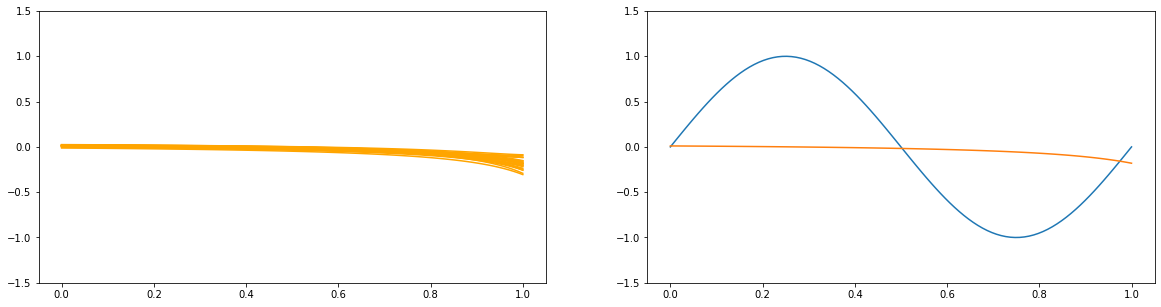

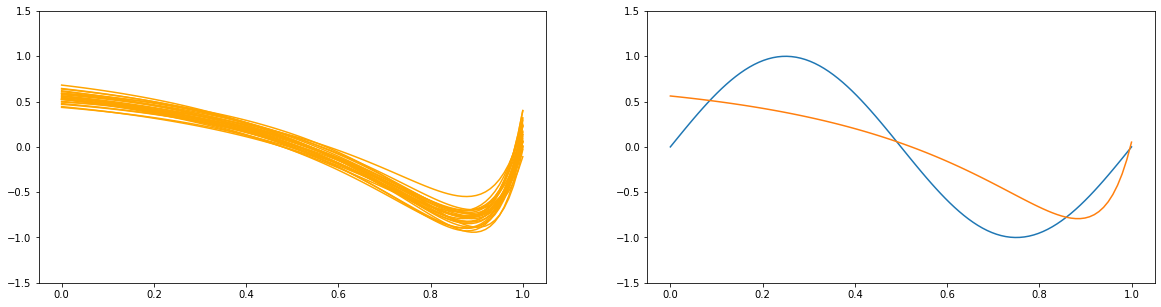

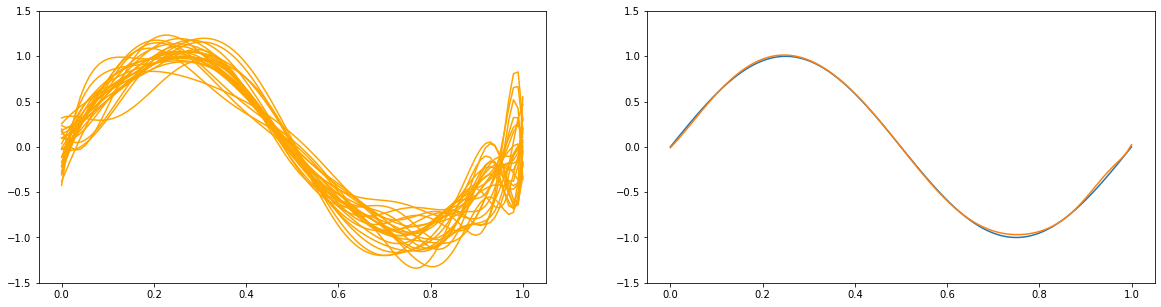

In [22]:
bias_variance()

<h2>Bayesian Linear Regression</h2>

## Parameter distribution

In [23]:
def f(x):
    return -0.3 + 0.5 * x

Function to update the posterior distribution parameters using:

$$ m_{N} = S_{N}(S_{0}^{-1}m_{0} + \beta \Phi^{T} \textbf{t}) $$
$$ S_{N}^{-1} = S_{0}^{-1} + \beta \Phi^{T}\Phi $$

In [41]:
def bayesianLinearRegression(X, t, mean_prev, precision_prev, beta):
    w_precision = precision_prev + beta * X.T @ X
    w_mean = np.linalg.solve(w_precision, precision_prev @ mean_prev + beta * X.T @ t)
    w_cov = np.linalg.inv(w_precision)
    return w_mean, w_precision, w_cov

In [38]:
x_train, y_train = create_toy_data(f, 20, 0.1, [-1, 1])
x = np.linspace(-1, 1, 100)
w0, w1 = np.meshgrid(
    np.linspace(-1, 1, 100),
    np.linspace(-1, 1, 100))
w = np.array([w0, w1]).transpose(1, 2, 0)

In [39]:
X_train = PolynomialFeatures(1).fit_transform(x_train.reshape(-1,1))
X = PolynomialFeatures(1).fit_transform(x.reshape(-1,1))

Function to ilustrate the update process of the weights.

[0. 0.]


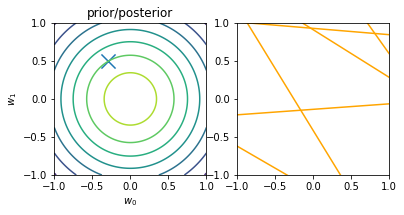

[0.11884143 0.11884143]


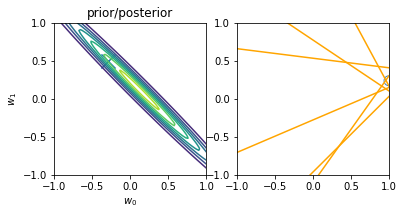

[-0.24283088  0.47790592]


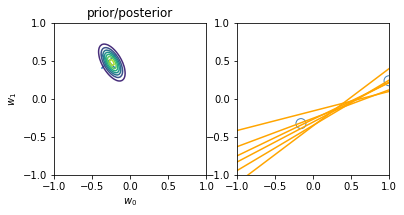

[-0.27123772  0.49443216]


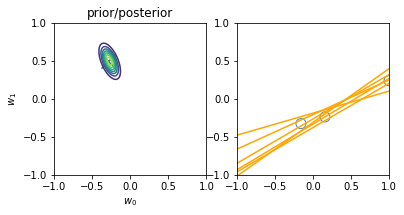

[-0.2832958   0.49180323]


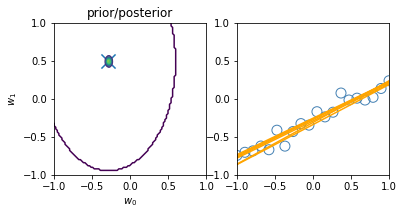

In [42]:
alpha = 1
beta = 100
mean_prev, precision_prev = np.zeros(np.size(X, 1)), alpha * np.eye(np.size(X, 1))
for begin, end in [[0, 0], [0, 1], [1, 2], [2, 3], [3, 20]]:
    w_mean, w_precision, w_cov = bayesianLinearRegression(X_train[begin: end], y_train[begin: end], mean_prev, precision_prev, beta)
    plt.subplot(1, 2, 1)
    plt.scatter(-0.3, 0.5, s=200, marker="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, w_mean, w_cov))
    print(w_mean)
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")

    w_sample = np.random.multivariate_normal(w_mean, w_cov, size=6)
    y_sample = X @ w_sample.T
    plt.subplot(1, 2, 2)
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=1)
    plt.plot(x, y_sample, c="orange")
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    mean_prev = w_mean
    precision_prev = w_precision

## Predictive distribution

In [43]:
x_train, y_train = create_toy_data(sinusoidal, 20, 0.1, [-1, 1])
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

X_train = PolynomialFeatures(11).fit_transform(x_train.reshape(-1,1))
X_test = PolynomialFeatures(11).fit_transform(x_test.reshape(-1,1))

We compute:

$$ p(t|x,\textbf{t},\alpha,\beta) = N(t|m_{N}^{T}\phi(x), \sigma_{N}^{2}(x)) $$

where $\sigma_{N}^{2}(x)$ is given by:

$$ \sigma_{N}^{2}(x) = \frac{1}{\beta} + \phi(x)^{T}S_{N}\phi(x) $$

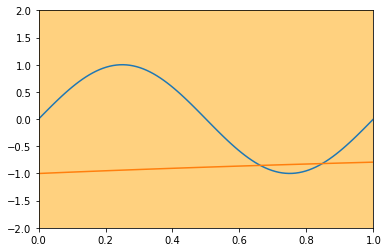

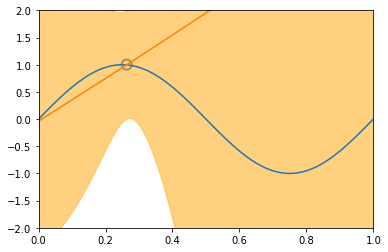

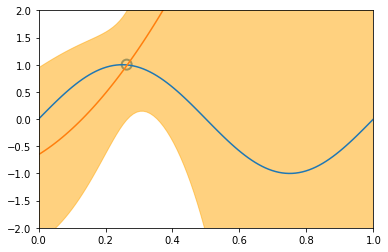

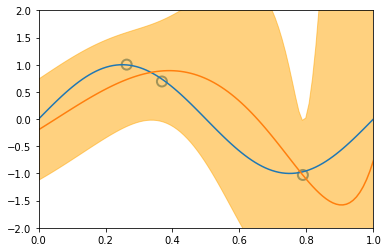

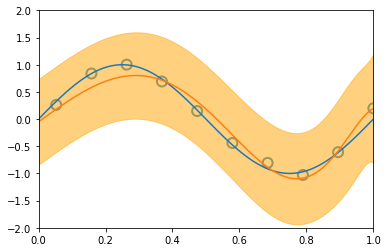

In [46]:
alpha = 1e-3
beta = 2
mean_prev, precision_prev = np.zeros(np.size(X_train, 1)), alpha * np.eye(np.size(X_train, 1))
for begin, end in [[0, 1], [1, 2], [2, 4], [4, 8], [8, 25]]:
    w_mean, w_precision, w_cov = bayesianLinearRegression(X_train[begin: end], y_train[begin: end], mean_prev, precision_prev, beta)
    y = X_test @ w_mean
    y_var = 1 / beta + np.sum(X_test @ w_cov * X_test, axis=1)
    y_std = np.sqrt(y_var)
    plt.scatter(x_train[:end], y_train[:end], s=100, facecolor="none", edgecolor="steelblue", lw=2)
    plt.plot(x_test, y_test)
    plt.plot(x_test, y)
    plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5)
    plt.xlim(0, 1)
    plt.ylim(-2, 2)
    plt.show()
    mean_prev = w_mean
    precision_prev = w_precision